In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
def load_and_average_on_keys(file, keys):
    df = pd.read_csv(file)

    df = df.groupby(keys, as_index=False).mean()
    
    df.drop(["try", "setuptime", "teardowntime"], axis=1, inplace=True)

    return df

# Files
files = {
    "sequencial_raw": "sequencial_raw.csv",
    "sequencial": "sequencial.csv",
    "parallel_omp": "parallel-omp.csv",
    "parallel_cuda": "parallel-cuda.csv"
}

# Load dataframes
seq_raw = load_and_average_on_keys(files["sequencial_raw"], ["grid_size","iterations"])
seq_opt = load_and_average_on_keys(files["sequencial"], ["grid_size","iterations"])
parallel_omp = load_and_average_on_keys(files["parallel_omp"], ["grid_size","iterations", "thread"])
parallel_cuda = load_and_average_on_keys(files["parallel_cuda"], ["grid_size","iterations", "block_size"])




# Speedup Chart: Sequential Raw vs Sequential Optimized

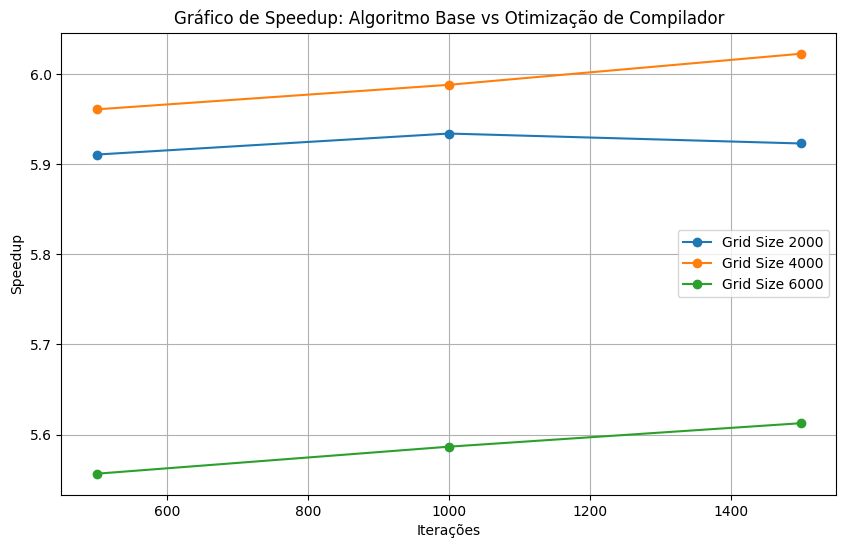

In [101]:
plt.figure(figsize=(10, 6))

for grid_size in seq_raw["grid_size"].unique():
    raw_subset = seq_raw[seq_raw["grid_size"] == grid_size]
    opt_subset = seq_opt[seq_opt["grid_size"] == grid_size]
    plt.plot(raw_subset["iterations"], raw_subset["runtime"] / opt_subset["runtime"], label=f"Grid Size {grid_size}", marker='o')

plt.xlabel("Iterações")
plt.ylabel("Speedup")
plt.title("Gráfico de Speedup: Algoritmo Base vs Otimização de Compilador")
plt.grid()
plt.legend()
plt.show()

# Speedup Chart: Parallel OMP vs Sequential Raw (12 threads)

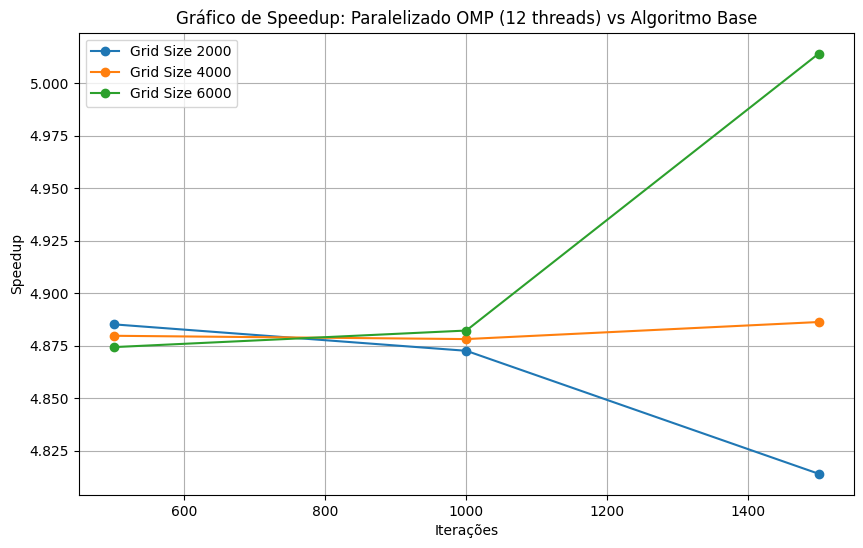

In [103]:
omp_12_threads = parallel_omp[parallel_omp["thread"] == 12]

plt.figure(figsize=(10, 6))

for grid_size in omp_12_threads["grid_size"].unique():

    omp_subset = omp_12_threads[omp_12_threads["grid_size"] == grid_size].reset_index()
    raw_subset = seq_raw[seq_raw["grid_size"] == grid_size].reset_index()

    plt.plot(omp_subset["iterations"], raw_subset["runtime"] / omp_subset["runtime"], label=f"Grid Size {grid_size}", marker='o')

plt.xlabel("Iterações")
plt.ylabel("Speedup")
plt.title("Gráfico de Speedup: Paralelizado OMP (12 threads) vs Algoritmo Base")
plt.grid()
plt.legend()
plt.show()

# Performance Chart: Parallel OMP

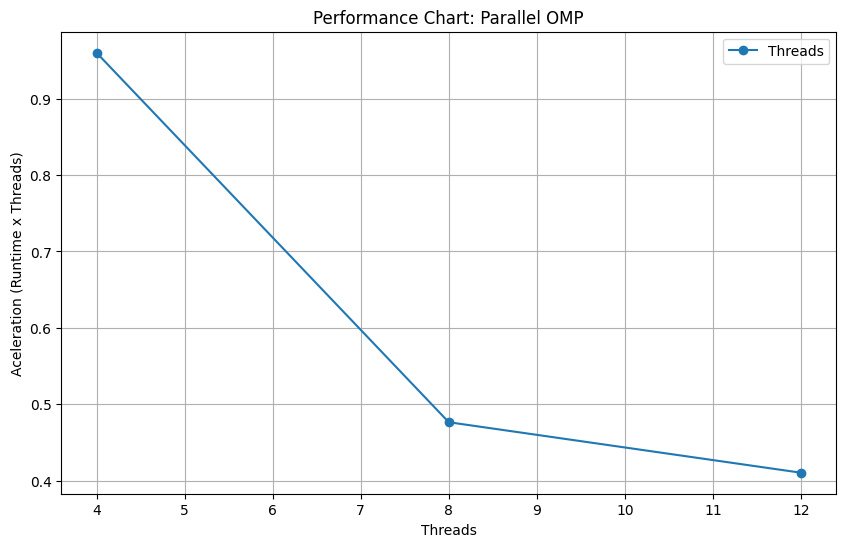

In [80]:
plt.figure(figsize=(10, 6))

data = parallel_omp[parallel_omp['grid_size'] == 6000].reset_index()
raw_subset = seq_raw[seq_raw["grid_size"] == 6000].reset_index()

average = []

for threads in data["thread"].unique():
    omp_subset = data[data["thread"] == threads].reset_index()
    
    speedup =  raw_subset["runtime"] / omp_subset["runtime"]

    performance:pd.Series = speedup / threads
    
    average.append(performance.mean())

plt.plot([4, 8, 12], average, label=f"Threads", marker='o')

plt.xlabel("Threads")
plt.ylabel("Aceleration (Runtime x Threads)")
plt.title("Performance Chart: Parallel OMP")
plt.legend()
plt.grid()
plt.show()


# Speedup Chart: Parallel CUDA vs Sequential Raw (Block size 8)


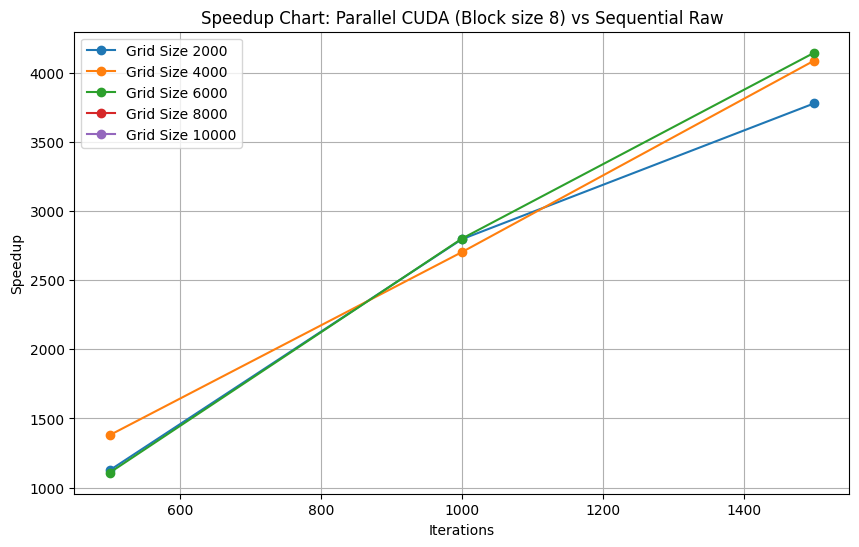

In [81]:
cuda_8_block = parallel_cuda[parallel_cuda["block_size"] == 8]

plt.figure(figsize=(10, 6))
for grid_size in cuda_8_block["grid_size"].unique():
    cuda_subset = cuda_8_block[cuda_8_block["grid_size"] == grid_size].reset_index()
    raw_subset = seq_raw[seq_raw["grid_size"] == grid_size].reset_index()

    plt.plot(cuda_subset["iterations"], raw_subset["runtime"] / cuda_subset["runtime"], label=f"Grid Size {grid_size}", marker='o')

plt.xlabel("Iterations")
plt.ylabel("Speedup")
plt.title("Speedup Chart: Parallel CUDA (Block size 8) vs Sequential Raw")
plt.legend()
plt.grid()
plt.show()

# Boxplot: Runtime vs Block Size (Parallel CUDA)

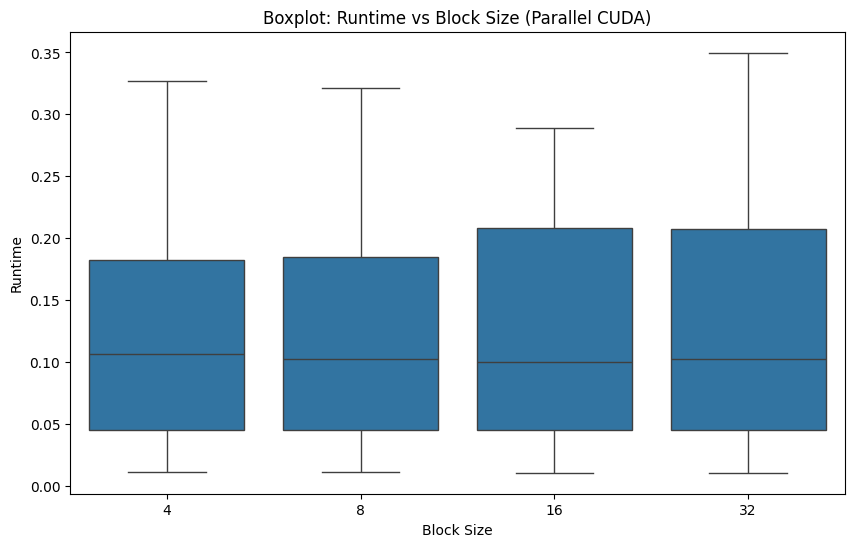

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=parallel_cuda, x="block_size", y="runtime")
plt.xlabel("Block Size")
plt.ylabel("Runtime")
plt.title("Boxplot: Runtime vs Block Size (Parallel CUDA)")
plt.show()

# Line Chart: Runtime vs Iterations (Grid size 6000)


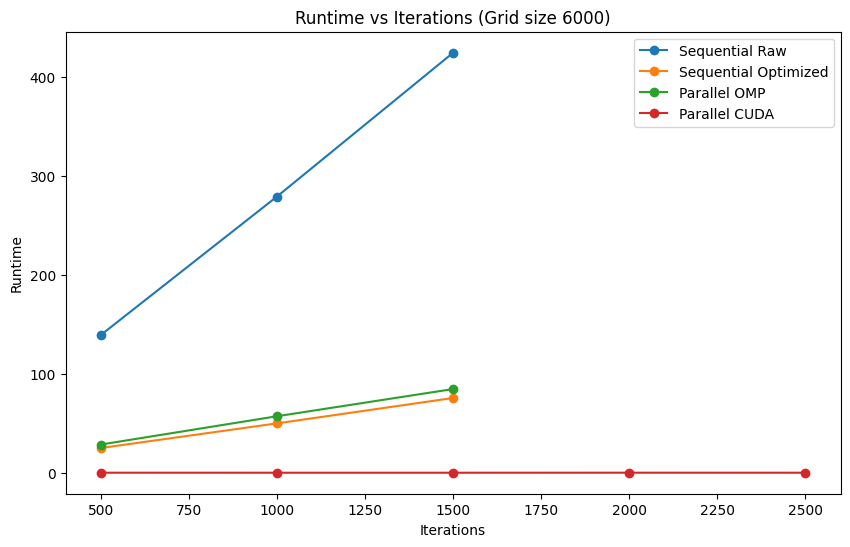

In [82]:
plt.figure(figsize=(10, 6))
grid_size_6000 = 6000

seq_raw_subset = seq_raw[seq_raw["grid_size"] == grid_size_6000]
seq_opt_subset = seq_opt[seq_opt["grid_size"] == grid_size_6000]

omp_subset = parallel_omp[parallel_omp["grid_size"] == grid_size_6000]
omp_subset = omp_subset[omp_subset['thread'] == 12]

cuda_subset = parallel_cuda[parallel_cuda["grid_size"] == grid_size_6000]
cuda_subset = cuda_subset[cuda_subset['block_size'] == 8]

plt.plot(seq_raw_subset["iterations"], seq_raw_subset["runtime"], label="Sequential Raw", marker="o")
plt.plot(seq_opt_subset["iterations"], seq_opt_subset["runtime"], label="Sequential Optimized", marker="o")
plt.plot(omp_subset["iterations"], omp_subset["runtime"], label="Parallel OMP", marker="o")
plt.plot(cuda_subset["iterations"], cuda_subset["runtime"], label="Parallel CUDA", marker="o")

plt.xlabel("Iterations")
plt.ylabel("Runtime")
plt.title("Runtime vs Iterations (Grid size 6000)")
plt.legend()
plt.show()


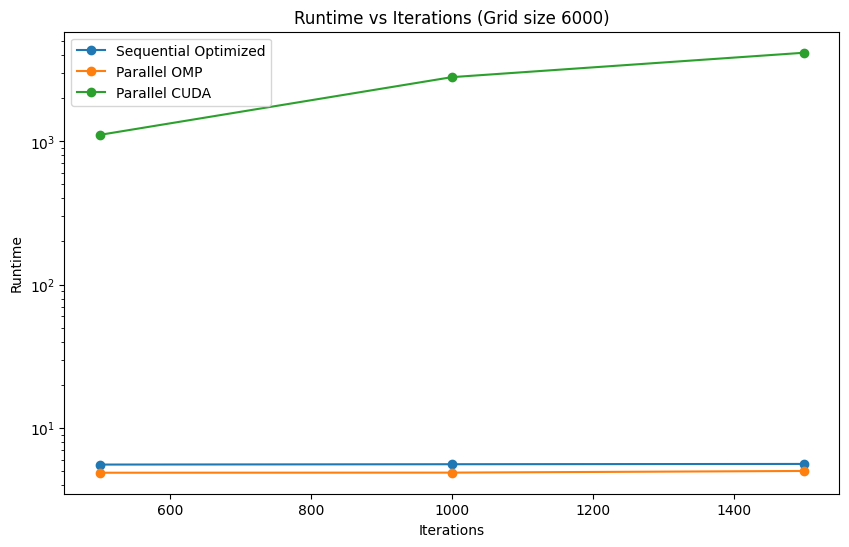

In [97]:
plt.figure(figsize=(10, 6))
grid_size_6000 = 6000

seq_raw_subset = seq_raw[seq_raw["grid_size"] == grid_size_6000].reset_index()

seq_opt_subset = seq_opt[seq_opt["grid_size"] == grid_size_6000].reset_index()

omp_subset = parallel_omp[parallel_omp["grid_size"] == grid_size_6000]
omp_subset = omp_subset[omp_subset['thread'] == 12].reset_index()

cuda_subset = parallel_cuda[parallel_cuda["grid_size"] == grid_size_6000]
cuda_subset = cuda_subset[cuda_subset['block_size'] == 8].reset_index()

plt.plot(seq_opt_subset["iterations"], seq_raw_subset["runtime"] / seq_opt_subset["runtime"], label="Sequential Optimized", marker="o")
plt.plot(omp_subset["iterations"], seq_raw_subset["runtime"] / omp_subset["runtime"], label="Parallel OMP", marker="o")
plt.plot(cuda_subset["iterations"], seq_raw_subset["runtime"] / cuda_subset["runtime"], label="Parallel CUDA", marker="o")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Runtime")
plt.title("Runtime vs Iterations (Grid size 6000)")
plt.legend()
plt.show()
